In [1]:
import py3Dmol
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

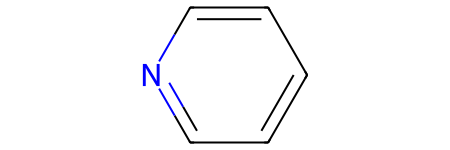

In [2]:
butane = Chem.MolFromSmiles('c1ccncc1')
butane

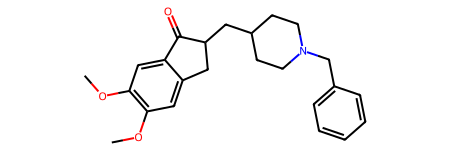

In [3]:
donz = Chem.MolFromSmiles('COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=C4)OC')
donz

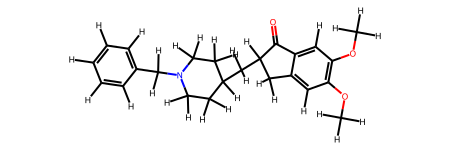

In [4]:
donzH = Chem.AddHs(donz)
donzH

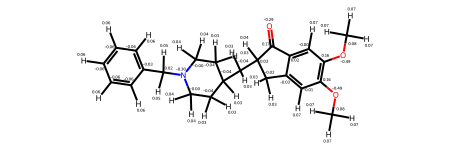

In [5]:
# Caluculate and display Gasteiger Charges for each atom
AllChem.ComputeGasteigerCharges(donzH)
donzH

donzH_charges = Chem.Mol(donzH)
for at in donzH_charges.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote',lbl)
donzH_charges

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

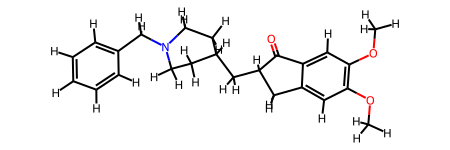

In [6]:
AllChem.EmbedMolecule(donzH)
rdkit.Chem.Draw.IPythonConsole.ipython_3d = True  # enable py3Dmol inline visualization
donzH

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

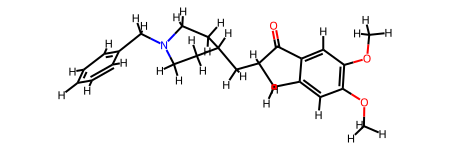

In [7]:
AllChem.MMFFOptimizeMolecule(donzH)
rdkit.Chem.Draw.IPythonConsole.ipython_3d = True  # enable py3Dmol inline visualization
donzH

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

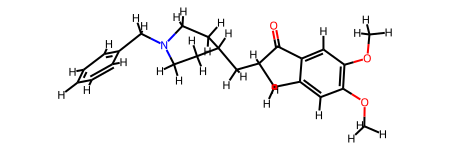

In [8]:
AllChem.MMFFOptimizeMolecule(donzH)
rdkit.Chem.Draw.IPythonConsole.ipython_3d = True  # enable py3Dmol inline visualization
donzH

In [9]:
#Displaying a chemical structure using RDKIT

#importing all the modules and submodels

from rdkit import Chem #RDKit Chemistry
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
from rdkit.Chem import Draw #RDKit drawing
# A few settings to improve the quality of structures
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframe
import mols2grid #The mols2grid library provides a convenient way of displaying molecules in a grid
import requests

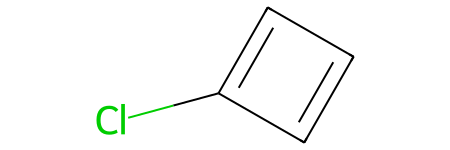

In [10]:
#Drawing molecules using smiles

mol = Chem.MolFromSmiles("c1ccc1Cl")
mol

In [11]:
imatinib = Chem.MolFromSmiles("Cc1ccc(cc1Nc2nccc(n2)c3cccnc3)NC(=O)c4ccc(cc4)CN5CCN(CC5)C")

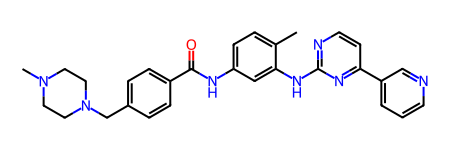

In [12]:
imatinib

In [13]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 146D-4036

 Directory of c:\Users\milan\Desktop\Machine Learning\Drug_discovery

03/05/2024  10:12 PM    <DIR>          .
03/05/2024  07:49 PM    <DIR>          ..
03/05/2024  10:12 PM           152,641 example_compounds.sdf
03/05/2024  10:16 PM         1,383,713 rajnish.ipynb
               2 File(s)      1,536,354 bytes
               2 Dir(s)  174,477,721,600 bytes free


In [14]:
#Drawing multiple compounds from sdf file

mols = [x for x in Chem.SDMolSupplier("example_compounds.sdf")]

In [15]:
mols

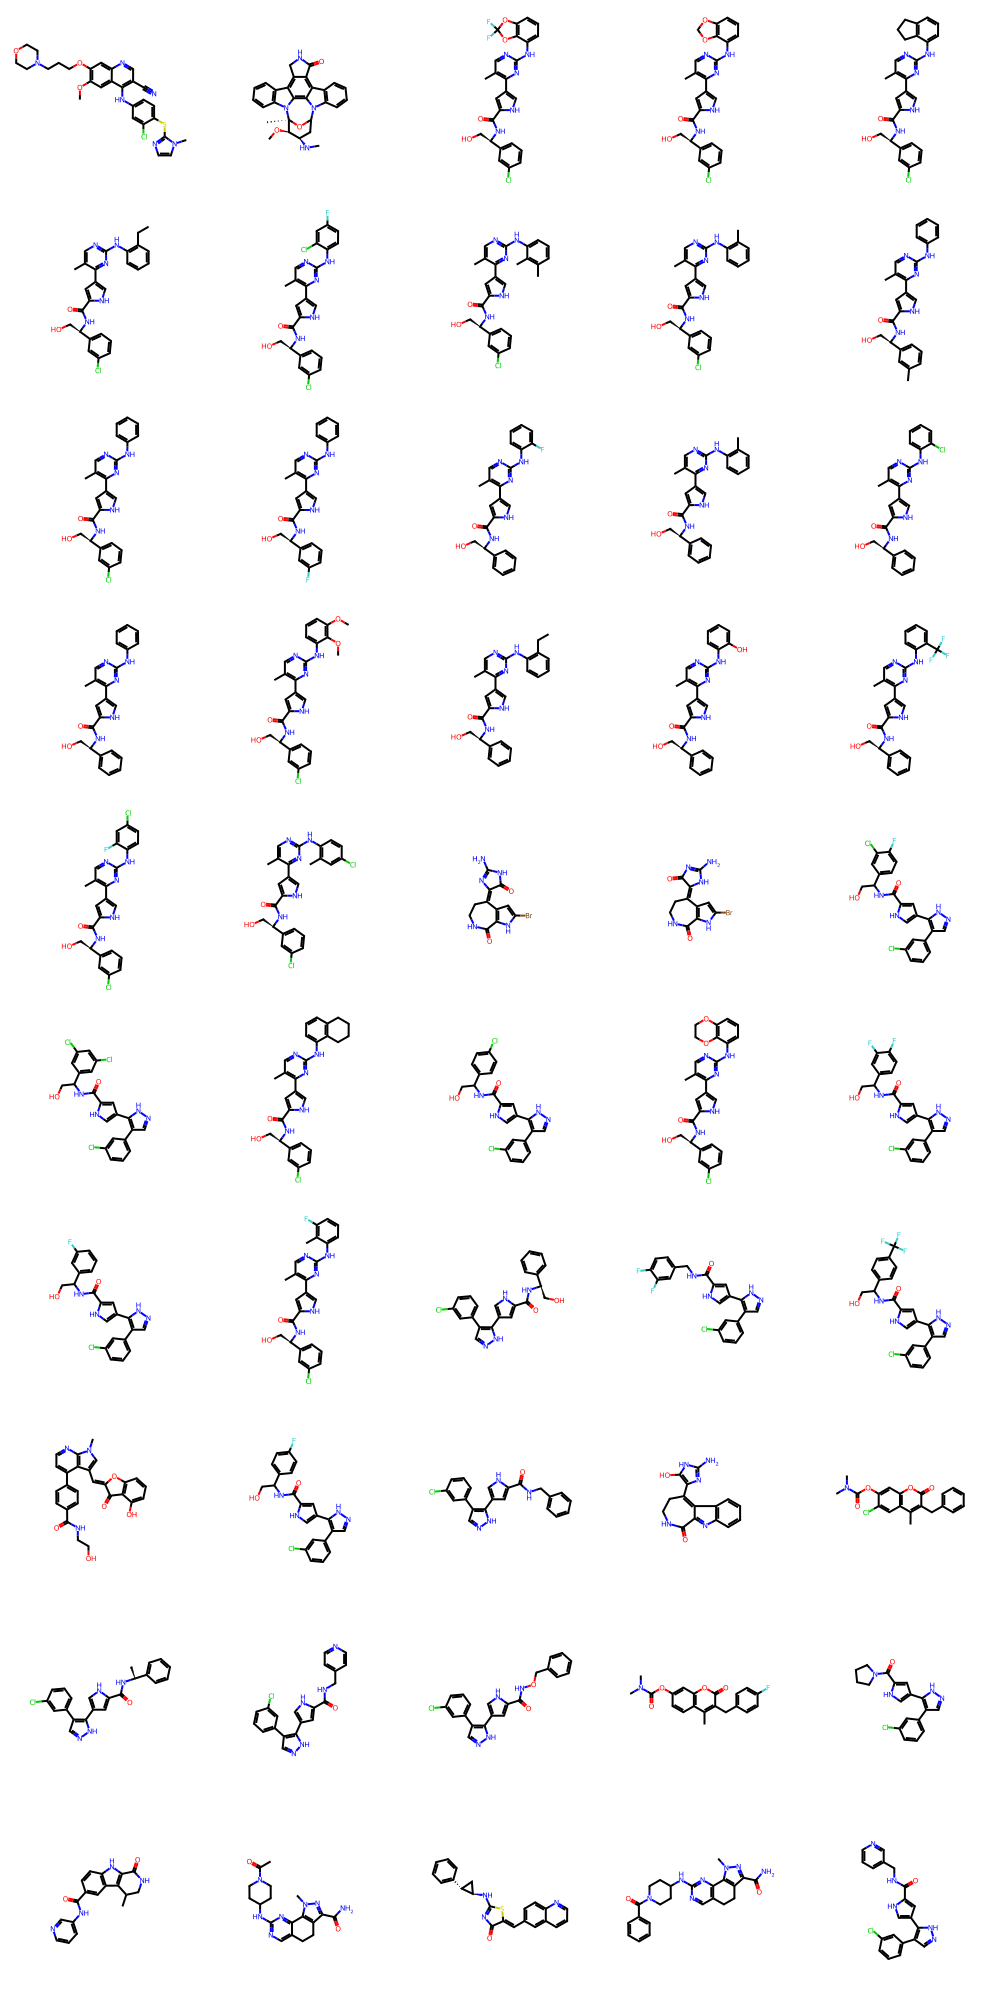

In [16]:
Draw.MolsToGridImage(mols,molsPerRow=5,useSVG=True)

In [17]:
#Drawing molecules in a Dataframe

df = PandasTools.LoadSDF("example_compounds.sdf")

In [18]:
mols2grid.display(df,mol_col="ROMol")

MolGridWidget()

In [19]:
#Drawing molecules and adding some physical properties

from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

In [20]:
two_decimals = lambda x: f"{x:.2f}"
mols2grid.display(df,mol_col="ROMol",subset=["img","MW","LogP"],transform={"MW" : two_decimals, "LogP": two_decimals})

MolGridWidget()

In [21]:
#Downloading Input data to Build and train model
#First we will upload the input solubility data to build and train the model
#Reading the input data using pandas
import pandas as pd
sol = pd.read_csv('delaney.csv')

In [22]:
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


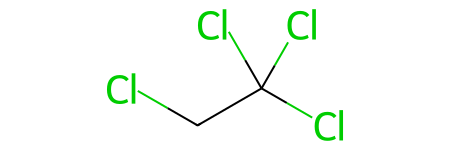

In [23]:
#Take a look at the first structure
from rdkit import Chem
Chem.MolFromSmiles(sol.SMILES[0])

In [24]:
#converting smiles to molecule list and Rdkit object list
from rdkit import Chem
mol_list= []
for element in sol.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [26]:
len(mol_list)

1144

In [27]:
import numpy as np
from rdkit.Chem import Descriptors
def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)

        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MolLogP","MolWt","NumRotatableBonds"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [28]:
#Make a datframe of the three descriptors
df = generate(sol.SMILES)
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [29]:
#we will see how to find aromatic atoms in molecule

SMILES = 'COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21'
m = Chem.MolFromSmiles(SMILES)
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]

In [30]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [31]:
#Aromatic atoms in each moelcule
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

In [32]:
#Heavy atom count in each molecule of the input data
desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_HeavyAtomCount

[6,
 5,
 6,
 5,
 8,
 4,
 4,
 8,
 10,
 10,
 10,
 9,
 9,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 4,
 8,
 4,
 5,
 8,
 8,
 10,
 12,
 4,
 9,
 9,
 9,
 15,
 8,
 4,
 8,
 8,
 5,
 8,
 8,
 12,
 12,
 8,
 6,
 8,
 8,
 10,
 8,
 12,
 12,
 5,
 12,
 6,
 14,
 11,
 22,
 15,
 5,
 5,
 8,
 7,
 11,
 9,
 6,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 8,
 7,
 11,
 6,
 4,
 11,
 10,
 13,
 12,
 8,
 7,
 7,
 17,
 7,
 6,
 7,
 6,
 5,
 8,
 11,
 4,
 7,
 14,
 11,
 15,
 9,
 11,
 11,
 13,
 6,
 10,
 9,
 9,
 19,
 9,
 8,
 8,
 16,
 6,
 5,
 5,
 9,
 4,
 15,
 22,
 20,
 18,
 20,
 18,
 16,
 19,
 19,
 18,
 17,
 17,
 18,
 16,
 7,
 18,
 18,
 16,
 17,
 8,
 9,
 16,
 7,
 6,
 7,
 8,
 6,
 14,
 18,
 19,
 18,
 17,
 17,
 16,
 11,
 11,
 15,
 15,
 10,
 8,
 11,
 15,
 10,
 10,
 11,
 9,
 6,
 6,
 12,
 7,
 8,
 15,
 15,
 10,
 15,
 10,
 10,
 16,
 9,
 8,
 8,
 8,
 7,
 9,
 8,
 13,
 14,
 14,
 9,
 12,
 9,
 8,
 13,
 14,
 12,
 15,
 11,
 11,
 4,
 8,
 5,
 5,
 8,
 6,
 9,
 13,
 5,
 11,
 8,
 4,
 8,
 6,
 11,
 8,
 7,
 9,
 9,
 7,
 9,
 12,
 9,
 8,
 8,
 7,
 7,
 11,
 7,
 4,
 10,
 12,
 5,

In [33]:
#calculating aromatic proportion

desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_AromaticProportion

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.5,
 0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.4,
 0.75,
 0.0,
 0.75,
 0.75,
 0.0,
 0.0,
 0.75,
 0.8333333333333334,
 0.5,
 0.75,
 0.0,
 0.75,
 0.75,
 0.6,
 0.75,
 0.8333333333333334,
 0.5,
 0.0,
 0.8333333333333334,
 0.0,
 1.0,
 0.0,
 0.0,
 0.9333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8333333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.8571428571428571,
 0.9090909090909091,
 0.9333333333333333,
 0.6666666666666666,
 0.9090909090909091,
 0.9090909090909091,
 0.7692307692307693,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [34]:
#Making a datafame of aromatic proportion

df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion,
                                              columns =['Aromatic Proportion'])

In [35]:
df_desc_AromaticProportion

,Aromatic Proportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


In [36]:
#combining all four descriptors into single data frame to form the X matrix
#X is the independent variable
X = pd.concat([df,df_desc_AromaticProportion], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,Aromatic Proportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [37]:
# Creating the Y matrix and Y is the dependent variable , ie solubility data
Y = sol.iloc[:,1]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

In [38]:
# splitting the data set to training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2)

### creating Regression model 

In [41]:
#creating a linear regression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [42]:
# predicting the log solubility of training set from descriptors of training datset
Y_pred_train = model.predict(X_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.73901473 -0.00666689  0.00580195 -0.45436714]
Intercept: 0.28315506304034166
Mean squared error (MSE): 1.05
Coefficient of determination (R^2): 0.77


In [46]:
Y_pred_test = model.predict(X_test)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.73901473 -0.00666689  0.00580195 -0.45436714]
Intercept: 0.28315506304034166
Mean squared error (MSE): 0.85
Coefficient of determination (R^2): 0.77


In [47]:
#Finding the equation which describe the relationship between descriptors and log solubility
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]
print('LogS = ' +
      ' ' +
      yintercept +
      ' ' +
      LogP +
      ' ' +
      MW +
      ' ' +
      RB +
      ' ' +
      AP)


LogS =  0.28 -0.74 LogP -0.0067 MW 0.0058 RB -0.45 AP


In [44]:
Y_train.shape, Y_pred_train.shape

((915,), (915,))

In [48]:
Y_test.shape, Y_pred_test.shape

((229,), (229,))

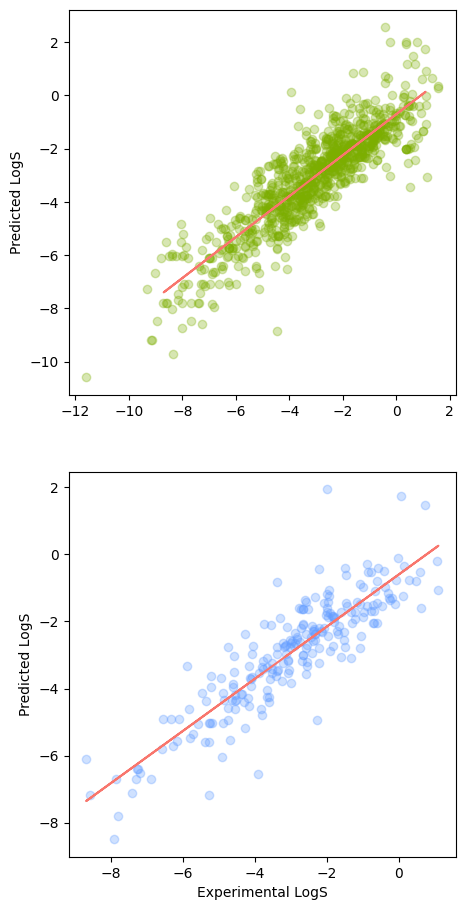

In [50]:
#ploting the predicted solubility and measured solubility
import matplotlib.pyplot as plt
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.savefig('plot_vertical_logS.png')
plt.savefig('plot_vertical_logS.pdf')
plt.show()

In [51]:
#loading new set of data to predict solubility of unknwon molecules using the model we build
sol1 = pd.read_csv('new_1.csv')

In [53]:
sol1.SMILES

0                        N(CCCCNCCCN)CCCN
1                    OC(CNC=1C=CC=CC1)COC
2                 O1C2(NC(C1)(CO)CO)CCCC2
3               ClC=1C(C=2C=CN=CC2)=CSC1N
4                    O=C(N1CC(CCC1)C)CCCC
5              NC1=CC=C2C3=CC=CC=C3CC2=C1
6             C=1C=CC=C2N=C3C=CC=CC3=CC21
7                   S=C(NNC=1C=CC=CC1)NCC
8             O1C(C2CC(=O)CC(=O)C2)=CC=C1
9             S1C(C2CC(=O)CC(=O)C2)=CC=C1
10            O=C1C2=CC=CC(=C2C(C=C1)=O)O
11              OC(C#CC1=CC=CC=C1)(CC=C)C
12                OCCN(C=1C=CC(N)=CC1)CCO
13              C(N1CCN(C)CC1)(N(CC)CC)=O
14             OC=1C=2C(C(O)=CC1)=CC=CC2O
15            ClC1=NC(=C(N)C(=C1C#N)COC)C
16               ClC1=CC(N(CCF)CCF)=CC=C1
17             C=1C(N(CC2=CC=CC=C2)SC1)=O
18              O=C1C2=CC=CC=C2C(=O)CC1=O
19           S1C(=C(SC1=S)C(OC)=O)C(OC)=O
20         C=1C=C2C(=CC1)C(=O)OC(=C2Cl)Cl
21               OC=1C=2N=CC=C(C2C=CC1)CO
22          C(C#N)(C#N)=NNC1=CC(=CC=C1)Cl
23          C=12C=3C(=NC=CC3)C=CC1

In [57]:
sol1

,Ambit_InchiKey,score,activity,SMILES
0,PFNFFQXMRSDOHW-UHFFFAOYNA-N,1,Active,N(CCCCNCCCN)CCCN
1,HOTSFPXUILMJMT-UHFFFAOYNA-N,1,Active,OC(CNC=1C=CC=CC1)COC
2,IEUAZNHOIZPQER-UHFFFAOYNA-N,1,Active,O1C2(NC(C1)(CO)CO)CCCC2
3,NZPYFPLXCCGDDX-UHFFFAOYNA-N,1,Active,ClC=1C(C=2C=CN=CC2)=CSC1N
4,XMYZXGRJFKLGLI-UHFFFAOYNA-N,1,Active,O=C(N1CC(CCC1)C)CCCC
5,CFRFHWQYWJMEJN-UHFFFAOYNA-N,1,Active,NC1=CC=C2C3=CC=CC=C3CC2=C1
6,DZBUGLKDJFMEHC-UHFFFAOYNA-N,1,Active,C=1C=CC=C2N=C3C=CC=CC3=CC21
7,DPELBGAJWVGUJS-QIQUEDJNNA-N,1,Active,S=C(NNC=1C=CC=CC1)NCC
8,FYLTVHCMIYGVPZ-UHFFFAOYNA-N,1,Active,O1C(C2CC(=O)CC(=O)C2)=CC=C1
9,GABNRVGIJFLKAW-UHFFFAOYNA-N,1,Active,S1C(C2CC(=O)CC(=O)C2)=CC=C1


In [54]:
#converting into rdkit objects
from rdkit import Chem
mol_list1= []
for element in sol1.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list1.append(mol)

In [55]:
mol_list1

In [58]:
df_1 = generate(sol1.SMILES)
df_1

,MolLogP,MolWt,NumRotatableBonds
0,-0.35660,202.346,11.0
1,1.10580,181.235,5.0
2,-0.40010,187.239,2.0
3,3.04570,210.689,1.0
4,2.43510,183.295,3.0
5,2.84000,181.238,0.0
6,3.38800,179.222,0.0
7,1.49750,195.291,3.0
8,1.68530,178.187,1.0
9,2.15380,194.255,1.0


In [60]:
#calculating aromatic proportion for new dataset
desc_AromaticAtoms_1 = [AromaticAtoms(element) for element in mol_list1]
desc_AromaticAtoms_1

[0,
 6,
 0,
 11,
 0,
 12,
 14,
 6,
 5,
 5,
 6,
 6,
 6,
 0,
 10,
 6,
 6,
 11,
 6,
 5,
 10,
 10,
 6,
 14,
 6,
 6,
 0,
 5,
 6,
 11,
 11,
 10,
 0,
 10,
 6,
 9,
 0,
 6,
 6,
 0,
 6,
 10,
 9,
 12,
 6,
 0,
 5,
 13,
 5,
 6,
 11,
 9,
 10]

In [61]:
desc_HeavyAtomCount_1 = [Descriptors.HeavyAtomCount(element) for element in mol_list1]
desc_HeavyAtomCount_1

[14,
 13,
 13,
 13,
 13,
 14,
 14,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 13,
 14,
 14,
 13,
 13,
 14,
 13,
 13,
 14,
 14,
 14,
 14,
 15,
 14,
 14,
 14,
 14,
 13,
 16,
 14,
 14,
 15,
 15,
 16,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 17,
 13,
 14,
 13,
 14,
 13,
 13,
 14]

In [62]:
desc_AromaticProportion_1 = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list1]
desc_AromaticProportion_1

[0.0,
 0.46153846153846156,
 0.0,
 0.8461538461538461,
 0.0,
 0.8571428571428571,
 1.0,
 0.46153846153846156,
 0.38461538461538464,
 0.38461538461538464,
 0.46153846153846156,
 0.42857142857142855,
 0.42857142857142855,
 0.0,
 0.7692307692307693,
 0.42857142857142855,
 0.42857142857142855,
 0.8461538461538461,
 0.46153846153846156,
 0.35714285714285715,
 0.7692307692307693,
 0.7692307692307693,
 0.42857142857142855,
 1.0,
 0.42857142857142855,
 0.42857142857142855,
 0.0,
 0.35714285714285715,
 0.42857142857142855,
 0.7857142857142857,
 0.7857142857142857,
 0.7692307692307693,
 0.0,
 0.7142857142857143,
 0.42857142857142855,
 0.6,
 0.0,
 0.375,
 0.46153846153846156,
 0.0,
 0.46153846153846156,
 0.7692307692307693,
 0.6923076923076923,
 0.8571428571428571,
 0.42857142857142855,
 0.0,
 0.38461538461538464,
 0.9285714285714286,
 0.38461538461538464,
 0.42857142857142855,
 0.8461538461538461,
 0.6923076923076923,
 0.7142857142857143]

In [64]:
df_desc_AromaticProportion1 = pd.DataFrame(desc_AromaticProportion_1,
                                              columns =['Aromatic Proportion'])

In [65]:
df_desc_AromaticProportion1

,Aromatic Proportion
0,0.000000
1,0.461538
2,0.000000
3,0.846154
4,0.000000
5,0.857143
6,1.000000
7,0.461538
8,0.384615
9,0.384615


In [66]:
df_1

,MolLogP,MolWt,NumRotatableBonds
0,-0.35660,202.346,11.0
1,1.10580,181.235,5.0
2,-0.40010,187.239,2.0
3,3.04570,210.689,1.0
4,2.43510,183.295,3.0
5,2.84000,181.238,0.0
6,3.38800,179.222,0.0
7,1.49750,195.291,3.0
8,1.68530,178.187,1.0
9,2.15380,194.255,1.0


In [67]:
#new X matrix for predicting the solubility using the model
X1 = pd.concat([df_1,df_desc_AromaticProportion1], axis=1)
X1

,MolLogP,MolWt,NumRotatableBonds,Aromatic Proportion
0,-0.35660,202.346,11.0,0.000000
1,1.10580,181.235,5.0,0.461538
2,-0.40010,187.239,2.0,0.000000
3,3.04570,210.689,1.0,0.846154
4,2.43510,183.295,3.0,0.000000
5,2.84000,181.238,0.0,0.857143
6,3.38800,179.222,0.0,1.000000
7,1.49750,195.291,3.0,0.461538
8,1.68530,178.187,1.0,0.384615
9,2.15380,194.255,1.0,0.384615


In [68]:
#predicting the log solubility of new dataset using the model
pred_x1 = model.predict(X1)

In [69]:
pred_x1

array([-0.7385103 , -1.92302025, -0.65786394, -3.75096604, -2.72102232,
       -3.41339899, -3.86984819, -2.31780609, -2.31921507, -2.77256714,
       -2.06859405, -2.88962326, -1.23513512, -1.54799846, -2.68682785,
       -2.52574992, -3.62718344, -2.81184723, -1.84496819, -3.09739886,
       -3.79077169, -2.28729586, -2.85677089, -3.42933117, -1.74243199,
       -4.67264476, -1.74257764, -2.03863267, -3.61738072, -3.33597048,
       -2.50409274, -3.70511452, -4.34683824, -3.61577265, -2.18803754,
       -2.85139492, -1.34313256, -2.97938599, -2.56130252, -2.47918181,
       -2.76235723, -2.84732349, -2.8633882 , -3.87266549, -3.79978696,
       -3.01330181, -1.82409226, -3.58880367, -0.60929031, -3.13221298,
       -2.65091882, -2.30158224, -2.66949694])

In [70]:
#conevrt results into dataframe
df_predict_x1 = pd.DataFrame(pred_x1,columns =['predicted_solubility'])
df_predict_x1

,predicted_solubility
0,-0.738510
1,-1.923020
2,-0.657864
3,-3.750966
4,-2.721022
5,-3.413399
6,-3.869848
7,-2.317806
8,-2.319215
9,-2.772567


In [71]:
#save the results

df_predict_x1.to_csv('result_solubility.csv')

### Now we build a SVM based classification QSAR model which predicts activity of compounds from its chemical fingerprints

In [72]:
#Importing the Tau inhibition activity data to build the SVM model
import pandas as pd
act = pd.read_csv('tau_activity.csv')

In [73]:
act

,ChEMBL ID,Bioactivities,Smiles,activity
0,CHEMBL1395000,3,COc1cc(NC(=O)CSc2ncc3c(n2)-c2ccc(Cl)cc2N(Cc2cc...,1
1,CHEMBL1789982,4,O=C(C[n+]1nc(-c2n[n+](CC(=O)c3ccccc3)c3n2CCCCC...,1
2,CHEMBL1571924,3,O=C(Oc1cc(OC(=O)c2ccccc2)c2c(c1)OC(c1ccc(OC(=O...,1
3,CHEMBL1593125,3,COc1ccc(NC(=O)Cn2c(=O)n(Cc3ccc4c(c3)OCO4)c(=O)...,1
4,CHEMBL1595105,3,CCC1C[N@@]2CCC1CC2[C@@H](NC(=S)Nc1cc(C(F)(F)F)...,1
...,...,...,...,...
109,CHEMBL359744,1317,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,0
110,CHEMBL28324,1380,CN([C@@H](Cc1ccc(OS(=O)(=O)c2cccc3cnccc23)cc1)...,0
111,CHEMBL163,1444,CC(C)c1nc(CN(C)C(=O)N[C@H](C(=O)N[C@@H](Cc2ccc...,0
112,CHEMBL64391,3282,CCC(C)n1ncn(-c2ccc(N3CCN(c4ccc(OCC5COC(Cn6cncn...,0


In [74]:
#Making a pandas data frame of the smiles structures in the input data

df_smiles = pd.DataFrame(act.Smiles)

In [75]:
#Now we will converet the smiles format to RDkit readable molecule list of objects

from rdkit import Chem
mol_list= []
for element in act.Smiles:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

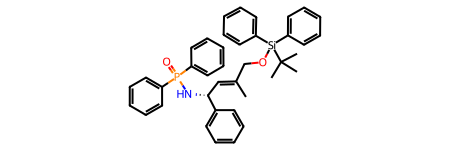

In [76]:
mol_list[45]

In [77]:
#checking the lenght of the molecule list
len(mol_list)

114

In [78]:
df_ml = pd.DataFrame(mol_list ,columns =['object'])

In [79]:
df_ml

,object
0,<rdkit.Chem.rdchem.Mol object at 0x00000294DC1...
1,<rdkit.Chem.rdchem.Mol object at 0x00000294DC1...
2,<rdkit.Chem.rdchem.Mol object at 0x00000294DC1...
3,<rdkit.Chem.rdchem.Mol object at 0x00000294DC1...
4,<rdkit.Chem.rdchem.Mol object at 0x00000294DC1...
...,...
109,<rdkit.Chem.rdchem.Mol object at 0x00000294DC1...
110,<rdkit.Chem.rdchem.Mol object at 0x00000294DC1...
111,<rdkit.Chem.rdchem.Mol object at 0x00000294DC1...
112,<rdkit.Chem.rdchem.Mol object at 0x00000294DC1...


In [81]:
#Now we will calculate Morgan / ECFP6 fingerprint for each molecule

import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
radius=3
nBits=1024

ECFP6 = [AllChem.GetMorganFingerprintAsBitVect(x,radius=radius, nBits=nBits) for x in df_ml['object']]

In [82]:
#Now we assing the molecular fingersprint data as X (Independent variable)

X = ECFP6

In [83]:
#Now we assign activity of each molecule from input data as dependendt variable

y = act.activity

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [88]:
#We import support vector machine (SVM) to build a classiification based model called svclassifier

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [89]:
#Now we predit the activity of test set (y_test) using the svm model using molecular fingerprint data(x_test) as input

y_pred = svclassifier.predict(X_test)

In [90]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0], dtype=int64)

In [91]:
#now we have to check the performace of the model

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[12  0]
 [ 4  7]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       1.00      0.64      0.78        11

    accuracy                           0.83        23
   macro avg       0.88      0.82      0.82        23
weighted avg       0.87      0.83      0.82        23



In [92]:
act_ache = pd.read_csv('ache_activity.csv')

In [93]:
act_ache

,Molecule ChEMBL ID,Smiles,bioactivity
0,CHEMBL3754694,COc1cccc2cc(CN(CCCCCCNc3c4c(nc5ccccc35)CCC4)Cc...,0.0003
1,CHEMBL105537,[Br-].[Br-].c1ccc2c[n+](CCCCCCCCCCCC[n+]3ccc4c...,0.0007
2,CHEMBL1200970,CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl,0.0020
3,CHEMBL3754778,COc1cccc2cc(CN(CCCCCCNc3c4c(nc5ccccc35)CCCCC4)...,0.0020
4,CHEMBL1200970,CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl,0.0020
...,...,...,...
224,CHEMBL4747185,COc1cccc(CNC2CCN(Cc3ccccc3)C2)c1OC,1.2500
225,CHEMBL3356954,O=C1C(Cl)=C(NCCCNc2c3c(nc4ccccc24)CCCC3)C(=O)c...,1.2600
226,CHEMBL4556097,Nc1cccc(Cl)c1Oc1ccc(CNc2cccc(O)c2)cc1,1.3000
227,CHEMBL3828679,CCCCCCCCCC(C)C1OCc2c[n+](C)c(C)c(OC(=O)N(C)C)c...,1.3000


In [94]:
mol_list_ache= []
for element in act_ache.Smiles:
  mol = Chem.MolFromSmiles(element)
  mol_list_ache.append(mol)

In [95]:
len(mol_list_ache)

229

In [96]:
#Now we will create a dataframe of the RDkit objects

df_ml_ache = pd.DataFrame(mol_list_ache ,columns =['object'])

In [97]:
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
radius=3
nBits=1024

ECFP6_ache = [AllChem.GetMorganFingerprintAsBitVect(x,radius=radius, nBits=nBits) for x in df_ml_ache['object']]

In [98]:
x_ache = ECFP6_ache

In [99]:
y_pred_ache = svclassifier.predict(x_ache)

In [100]:
#Convert the results into dataframe

df_pred_ache = pd.DataFrame(y_pred_ache)

In [101]:
df_pred_ache.to_csv('result.csv')